In [0]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from tqdm import tqdm

# Get Dataset

In [0]:
x_train = pd.read_csv('/content/drive/My Drive/Beat-PD/DecisionTree/PreProcessing.csv')
y_train = pd.read_csv('/content/drive/My Drive/Beat-PD/DecisionTree/PreProcessing_labels.csv')

In [0]:
x_test = pd.read_csv('/content/drive/My Drive/Beat-PD/DecisionTree/Test_preproc.csv')
y_test = pd.read_csv('/content/drive/My Drive/Beat-PD/DecisionTree/Test_preproc_labels.csv')

In [4]:
x_train.head()

,Unnamed: 0,mean_head,std_head,mean_tail,std_tail,mean_minvalues,std_minvalues,mean_maxwidth,std_maxwidth,mean_minwidth,std_minwidth
0,0,1.074466,0.309275,0.984807,0.001068,0.119850,0.045030,1.027660,0.455244,0.994250,0.004841
1,1,0.985835,0.000878,0.995408,0.007281,0.185952,0.027779,0.986296,0.001101,0.986086,0.000784
2,2,0.996514,0.003085,0.985103,0.000888,0.309666,0.045726,0.998909,0.097789,0.993977,0.001036
3,3,0.992370,0.038878,1.014045,0.038022,0.488698,0.057302,1.019825,0.191242,0.996091,0.027389
4,4,1.005656,0.023900,0.992069,0.028614,0.314427,0.044847,1.020675,0.242810,0.991363,0.008286


In [5]:
y_train.head()

,Unnamed: 0,subject_id,on_off,dyskinesia,tremor
0,0,1004,1.0,1.0,1.0
1,1,1004,0.0,0.0,0.0
2,2,1004,1.0,1.0,1.0
3,3,1004,3.0,3.0,3.0
4,4,1004,1.0,1.0,1.0


In [6]:
x_test.head()

,Unnamed: 0,mean_head,std_head,mean_tail,std_tail,mean_minvalues,std_minvalues,mean_maxwidth,std_maxwidth,mean_minwidth,std_minwidth
0,0,0.999624,0.014589,0.999313,0.012270,0.493636,0.027113,1.056479,0.437373,0.998764,0.002560
1,1,1.000995,0.034288,1.002105,0.004454,0.597536,0.099475,1.010080,0.119628,1.001746,0.001832
2,2,1.001198,0.001776,1.001318,0.001629,0.487551,0.060715,1.003469,0.116287,1.001677,0.002367
3,3,1.001031,0.004022,1.001594,0.002957,0.747401,0.016309,1.007409,0.088983,0.997594,0.001280
4,4,1.019600,0.118438,1.001579,0.100055,0.340468,0.104148,1.003827,0.126843,0.999338,0.001456


In [7]:
y_test.head()

,Unnamed: 0,subject_id,on_off,dyskinesia,tremor
0,0,1043,2.0,1.0,2.0
1,1,1043,2.0,0.0,2.0
2,2,1043,1.0,0.0,1.0
3,3,1043,1.0,0.0,1.0
4,4,1043,1.0,0.0,1.0


# Preproccessing

In [0]:
x_train.drop('Unnamed: 0', axis=1, inplace=True)
y_train.drop(['Unnamed: 0', 'subject_id'], axis=1, inplace=True)
x_test.drop('Unnamed: 0', axis=1, inplace=True)
y_test.drop(['Unnamed: 0', 'subject_id'], axis=1, inplace=True)

# Training

In [35]:
best_deep = 100
best_mse = 100

list_mse = {
    'deep': [],
    'train': [],
    'test': []
}

for deep in tqdm(range(1, 20)):
    model = DecisionTreeClassifier(criterion='entropy', max_depth=deep)
    model.fit(x_train, y_train[['on_off']])

    train_mse = mean_squared_error(y_train[['on_off']], model.predict(x_train))
    test_mse = mean_squared_error(y_test[['on_off']], model.predict(x_test))
    
    list_mse['deep'].append(deep)
    list_mse['train'].append(train_mse)
    list_mse['test'].append(test_mse)

    if test_mse < best_mse:
        best_deep = deep
        best_mse = test_mse

print("/n Best_MSE = {} - Deep = {}".format(best_mse, best_deep))

100%|██████████| 19/19 [00:00<00:00, 39.08it/s]

/n Best_MSE = 2.66839378238342 - Deep = 12


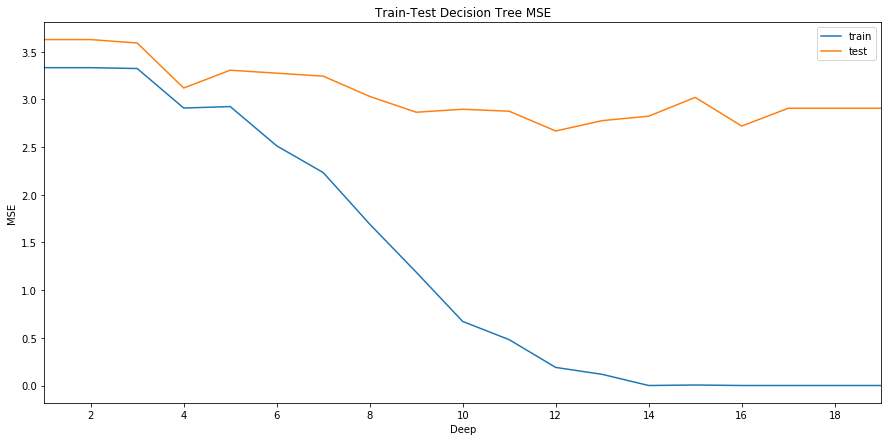

In [36]:
df = pd.DataFrame(list_mse, columns = ['deep', 'train', 'test'])
df.set_index(keys = 'deep', inplace=True)
df[['train', 'test']].plot(kind='line', figsize=(15, 7))
plt.xlabel('Deep')
plt.ylabel('MSE')
plt.title('Train-Test Decision Tree MSE')
plt.show()